### Hello Reader, I got this DataSet from Github and i performed some intersting Analysis from it. Have fun Analyzing

In [147]:
import pandas as pd
import numpy as np
import os

In [148]:
df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("All_Data.csv",index = False)


In [149]:
all_data =  pd.read_csv("All_Data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [150]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [151]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [152]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [153]:
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
all_data = all_data.dropna(how = "all")

In [155]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [156]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [157]:
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype(float)
all_data["Price Each"]=all_data["Price Each"].astype(float)

# all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [158]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [159]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

In [160]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


In [161]:
all_data["Month"]  = all_data["Order Date"].str[0:2]

In [162]:
all_data["Month"] = all_data["Month"].astype("int32")

In [163]:
results = all_data.groupby("Month").sum()

/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/3404397834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("Month").sum()


In [89]:
all_data.value_counts("Month")

Month
12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
dtype: int64

In [164]:
import matplotlib.pyplot as plt

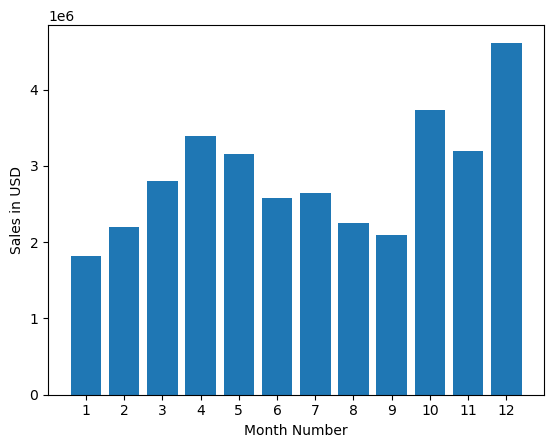

In [165]:
months = range(1,13)
plt.bar(months , results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month Number")
plt.show()

In [166]:

def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x)+ " "+ get_state(x))

In [167]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,New York City NY
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta GA


In [168]:
results = all_data.groupby("City").sum()

/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/3587463654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("City").sum()


In [169]:
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602.0,2779908.20,2795498.58,104794
Austin TX,11153.0,1809873.61,1819581.75,69829
Boston MA,22528.0,3637409.77,3661642.01,141112
Dallas TX,16730.0,2752627.82,2767975.40,104620
Los Angeles CA,33289.0,5421435.23,5452570.80,208325
New York City NY,27932.0,4635370.83,4664317.43,175741
Portland ME,2750.0,447189.25,449758.27,17144
Portland OR,11303.0,1860558.22,1870732.34,70621
San Francisco CA,50239.0,8211461.74,8262203.91,315520


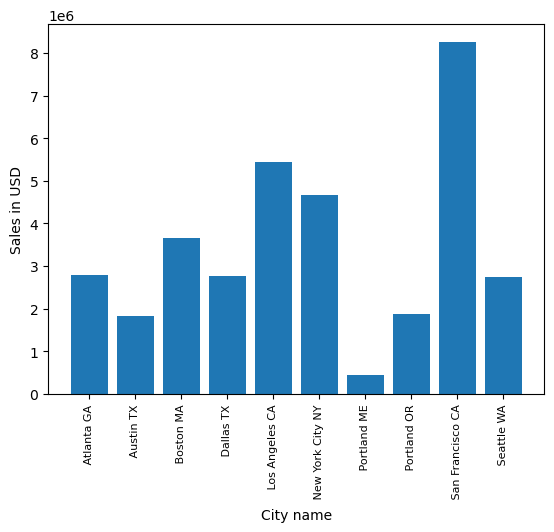

In [170]:
city = [city for city, df in all_data.groupby("City")]
plt.bar(city , results["Sales"])
plt.xticks(city , rotation ="vertical",size =8)
plt.ylabel("Sales in USD")
plt.xlabel("City name")
plt.show()

In [171]:

all_data["Order Date"] =pd.to_datetime(all_data["Order Date"])

In [172]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta GA


In [173]:
all_data["Hour"] =all_data["Order Date"].dt.hour
all_data["Minute"] =all_data["Order Date"].dt.minute

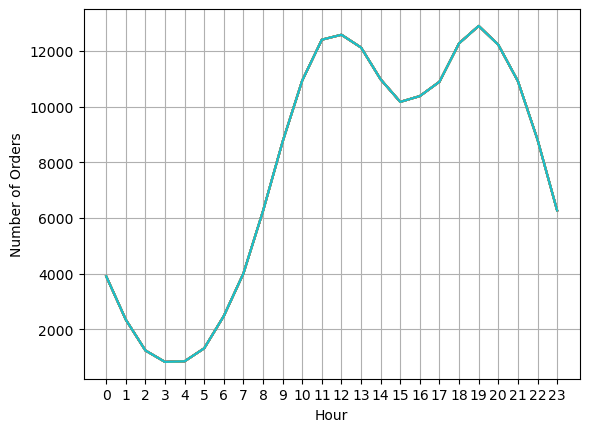

In [174]:
hours = [hour for hour , df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

In [175]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/4260849064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute,Grouped
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",600.00,12,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.95,12,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",99.99,12,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.99,12,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",400.00,12,New York City NY,14,32,"Vareebadd Phone,USB-C Charging Cable"


In [176]:
df = df[["Order ID","Grouped"]].drop_duplicates()

In [177]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [180]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [181]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,New York City NY,0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,New York City NY,7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,New York City NY,18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,Atlanta GA,12,38


/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/1834352782.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered =product_group.sum()["Quantity Ordered"]


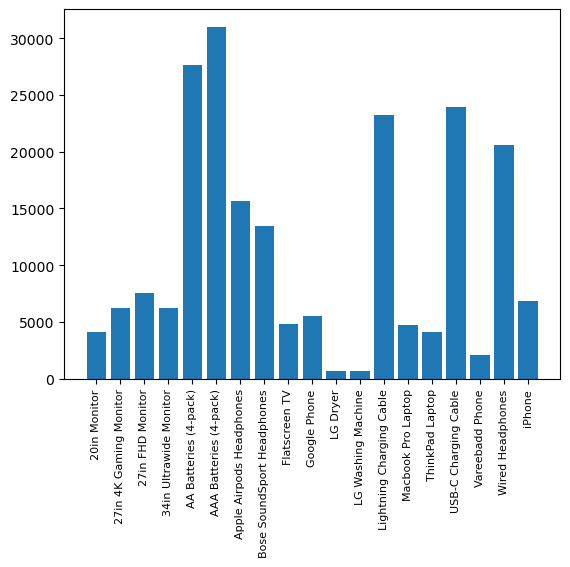

In [189]:
product_group =all_data.groupby("Product")
quantity_ordered =product_group.sum()["Quantity Ordered"]
products = [product for product , df in product_group]
plt.bar(products, quantity_ordered)

plt.xticks(products , rotation ="vertical",size =8)

plt.show()


/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/949056852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()["Price Each"]
/var/folders/fb/42myvx2n7qj1h3pccz2ljltw0000gn/T/ipykernel_29746/949056852.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8)


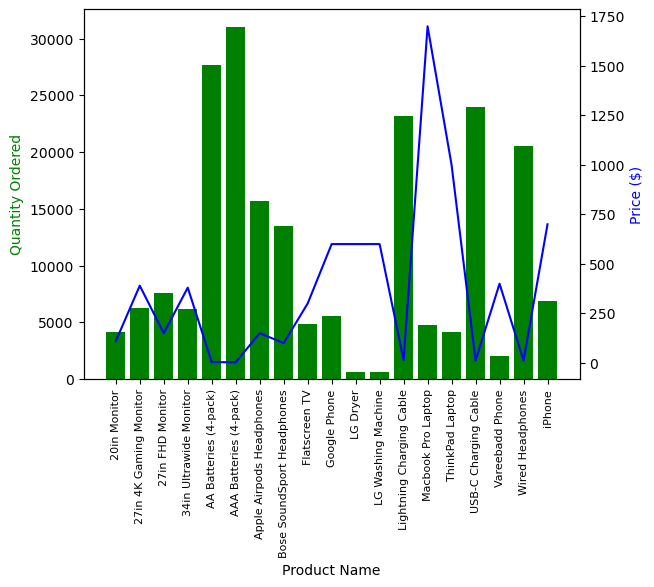

In [198]:
prices = all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color= "g")
ax2.plot(products,prices ,"b-")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color = "g")
ax2.set_ylabel('Price ($)', color ='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)
plt.show()

###    Summary:
    -The graph tells us that when the price is more people tend to buy them less and vice versa.
    -During the December Month , people tend to buy alot. It maybe due to holiday season.
    -California is where most of the sale happens and Portland has the least.
    -During 7pm most have the people order so we can direct advertisement during that time.